EDA of soil moisture of the state of Goa (2018 and 2020)

In [57]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#opens the csv files (sm_Goa_2018 and sm_Goa_2020)
df_sm_18=pd.read_csv(r'C:\Users\Malhar\OneDrive\Desktop\python\goa_soil_moisture\sm_Goa_2018.csv')
df_sm_20=pd.read_csv(r'C:\Users\Malhar\OneDrive\Desktop\python\goa_soil_moisture\sm_Goa_2020.csv')

In [44]:
df_sm_18.head()#display the 2018 data for refrence

,Date,State Name,DistrictName,Average Soilmoisture Level (at 15cm),Average SoilMoisture Volume (at 15cm),Aggregate Soilmoisture Percentage (at 15cm),Volume Soilmoisture percentage (at 15cm)
0,2018/06/30,GOA,SOUTH GOA,8.15,-,69.08,42.967552
1,2018/06/30,GOA,NORTH GOA,5.67,-,47.87,42.745536
2,2018/06/29,GOA,SOUTH GOA,8.21,-,69.71,43.652440
3,2018/06/29,GOA,NORTH GOA,5.64,-,47.69,43.314815
4,2018/06/28,GOA,SOUTH GOA,8.14,-,69.13,43.733764


In [45]:
df_sm_20.head()#dislay the 2020 data for refrence

,Date,State Name,DistrictName,Average Soilmoisture Level (at 15cm),Average SoilMoisture Volume (at 15cm),Aggregate Soilmoisture Percentage (at 15cm),Volume Soilmoisture percentage (at 15cm)
0,2020/01/31,GOA,SOUTH GOA,0.0,143.22,0.0,14.100070
1,2020/01/31,GOA,NORTH GOA,0.0,103.34,0.0,11.821571
2,2020/01/30,GOA,SOUTH GOA,0.0,143.64,0.0,14.141436
3,2020/01/30,GOA,NORTH GOA,0.0,103.73,0.0,11.866049
4,2020/01/29,GOA,SOUTH GOA,0.0,144.17,0.0,14.193610


In [46]:
df_sm_18.shape[0]#total number of entries in the data set

3424

In [47]:
df_sm_20.shape[0]#total number of entries in the data set

496

we will drop the columns State Name, Average Soilmoisture Level (at 15cm), Average SoilMoisture Volume (at 15cm), Aggregate Soilmoisture Percentage (at 15cm) and only work with Date, District name and Volume Soilmoisture percentage (at 15cm) 

In [48]:
df_sm_18=df_sm_18.drop(["State Name","Average Soilmoisture Level (at 15cm)", "Average SoilMoisture Volume (at 15cm)","Aggregate Soilmoisture Percentage (at 15cm)"], axis=1)
df_sm_18.head()

,Date,DistrictName,Volume Soilmoisture percentage (at 15cm)
0,2018/06/30,SOUTH GOA,42.967552
1,2018/06/30,NORTH GOA,42.745536
2,2018/06/29,SOUTH GOA,43.652440
3,2018/06/29,NORTH GOA,43.314815
4,2018/06/28,SOUTH GOA,43.733764


In [49]:
df_sm_20=df_sm_20.drop(["State Name","Average Soilmoisture Level (at 15cm)", "Average SoilMoisture Volume (at 15cm)","Aggregate Soilmoisture Percentage (at 15cm)"], axis=1)
df_sm_20.head()

,Date,DistrictName,Volume Soilmoisture percentage (at 15cm)
0,2020/01/31,SOUTH GOA,14.100070
1,2020/01/31,NORTH GOA,11.821571
2,2020/01/30,SOUTH GOA,14.141436
3,2020/01/30,NORTH GOA,11.866049
4,2020/01/29,SOUTH GOA,14.193610


Now that the unnecessary columns are dropped, will focus on dealing with null values and clean the data

In [50]:
#checking for null values
df_sm_18.isnull().sum()

Date                                        2996
DistrictName                                2996
Volume Soilmoisture percentage (at 15cm)    2996
dtype: int64

In [51]:
#checking for null values
df_sm_20.isnull().sum()

Date                                        0
DistrictName                                0
Volume Soilmoisture percentage (at 15cm)    0
dtype: int64

There are 2996 entries with null values in the 2018 soilmoisture records so we will drop the rows with these null values

In [52]:
#drops the rows with the null values and then checks for null values(since it is 0 it means that there are no null values)
df_sm_18=df_sm_18.dropna()
df_sm_18.isnull().sum()
# df_sm_18.shape[0]

Date                                        0
DistrictName                                0
Volume Soilmoisture percentage (at 15cm)    0
dtype: int64

In [53]:
#rename the column to make it easier to work with 
df_sm_18=df_sm_18.rename(columns={"Date":"date","DistrictName":"district","Volume Soilmoisture percentage (at 15cm)":"vol_sm_percentage"})
df_sm_18.head()

,date,district,vol_sm_percentage
0,2018/06/30,SOUTH GOA,42.967552
1,2018/06/30,NORTH GOA,42.745536
2,2018/06/29,SOUTH GOA,43.652440
3,2018/06/29,NORTH GOA,43.314815
4,2018/06/28,SOUTH GOA,43.733764


In [54]:
#rename the column to make it easier to work with 
df_sm_20=df_sm_20.rename(columns={"Date":"date","DistrictName":"district","Volume Soilmoisture percentage (at 15cm)":"vol_sm_percentage"})
df_sm_20.head()

,date,district,vol_sm_percentage
0,2020/01/31,SOUTH GOA,14.100070
1,2020/01/31,NORTH GOA,11.821571
2,2020/01/30,SOUTH GOA,14.141436
3,2020/01/30,NORTH GOA,11.866049
4,2020/01/29,SOUTH GOA,14.193610


Now that the data is somewhat clean we will plot graphs to see trends

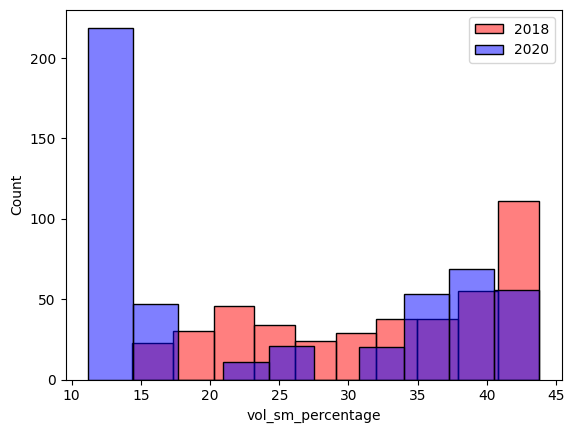

In [66]:
sns.histplot(df_sm_18["vol_sm_percentage"],label="2018", color="red", alpha=0.5,bins=10)
sns.histplot(df_sm_20["vol_sm_percentage"],label="2020", color="blue",alpha=0.5,bins=10)
plt.legend()

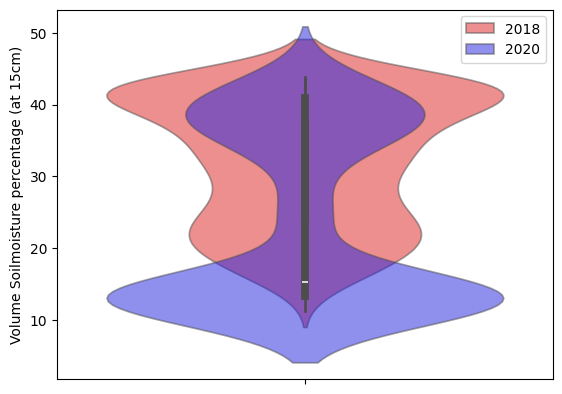

In [67]:
sns.violinplot(df_sm_18["vol_sm_percentage"],label="2018",color="red",alpha=0.5)
sns.violinplot(df_sm_20["vol_sm_percentage"],label="2020",color="blue",alpha=0.5)
plt.ylabel("Volume Soilmoisture percentage (at 15cm)")
plt.legend()

In [79]:
#get average of Volume Soilmoisture percentage (at 15cm)
goa_sm_18=df_sm_18["vol_sm_percentage"].mean()
goa_sm_18=str(goa_sm_18)#convert float to str (due to type error)
print("Average of Volume Soilmoisture percentage in 2018 is : "+goa_sm_18)

goa_sm_20=df_sm_20["vol_sm_percentage"].mean()
goa_sm_20=str(goa_sm_20)#convert float to str (due to type error)
print("Average of Volume Soilmoisture percentage in 2020 is : "+goa_sm_20)


Average of Volume Soilmoisture percentage in 2018 is : 32.38125725824766
Average of Volume Soilmoisture percentage in 2020 is : 23.900167474576612


In [81]:
north_goa_data_18 = df_sm_18[df_sm_18['district'].str.upper() == 'NORTH GOA']
south_goa_data_18 = df_sm_18[df_sm_18['district'].str.upper() == 'SOUTH GOA']

# Calculate the average volume soil moisture percentage
north_goa_avg_18 = north_goa_data_18['vol_sm_percentage'].mean()
south_goa_avg_18 = south_goa_data_18['vol_sm_percentage'].mean()
north_goa_avg_18=str(north_goa_avg_18)
south_goa_avg_18=str(south_goa_avg_18)
print("Average volume soilmoisture percentage of North Goa in 2018 is "+north_goa_avg_18)
print("Average volume soilmoisture percentage of South Goa in 2018 is "+south_goa_avg_18)

Average volume soilmoisture percentage of North Goa in 2018 is 32.06511609238317
Average volume soilmoisture percentage of South Goa in 2018 is 32.697398424112144


In [83]:
north_goa_data_20 = df_sm_20[df_sm_20['district'].str.upper() == 'NORTH GOA']
south_goa_data_20 = df_sm_20[df_sm_20['district'].str.upper() == 'SOUTH GOA']

# Calculate the average volume soil moisture percentage
north_goa_avg_20 = north_goa_data_20['vol_sm_percentage'].mean()
south_goa_avg_20 = south_goa_data_20['vol_sm_percentage'].mean()
north_goa_avg_20=str(north_goa_avg_20)
south_goa_avg_20=str(south_goa_avg_20)
print("Average volume soilmoisture percentage of North Goa in 2020 is "+north_goa_avg_20)
print("Average volume soilmoisture percentage of South Goa in 2020 is "+south_goa_avg_20)

Average volume soilmoisture percentage of North Goa in 2020 is 23.107968565725812
Average volume soilmoisture percentage of South Goa in 2020 is 24.69236638342742


We will try to see the veraitions in soil moisture percentage over the monthes for the years 2018 and 2020

In [87]:
#convert the data in the dataframe to datetime format
df_sm_18["date"]=pd.to_datetime(df_sm_18["date"])
# df_sm_18.head()
df_sm_18["month"]=df_sm_18["date"].dt.to_period("M")
#calculating the monthly average
monthly_avg_18=df_sm_18.groupby("month")["vol_sm_percentage"].mean()
# print(monthly_avg_18)


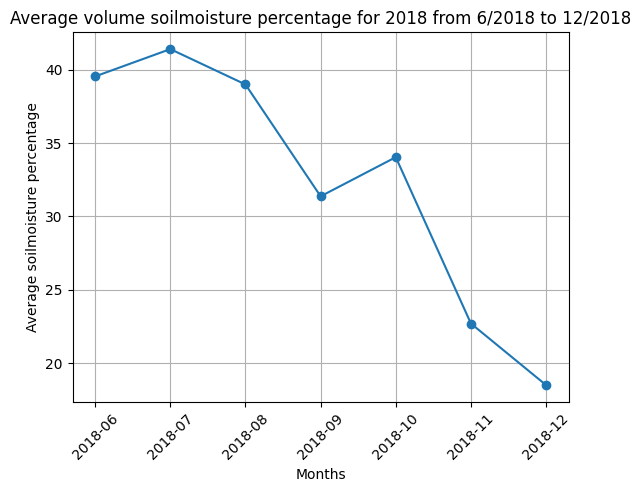

In [99]:
#plot graph of monthly average
plt.plot(monthly_avg_18.index.astype(str), monthly_avg_18.values,marker='o')
plt.xlabel("Months")
plt.ylabel("Average soilmoisture percentage")
plt.title("Average volume soilmoisture percentage for 2018 from 6/2018 to 12/2018")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [90]:
#convert the data in the dataframe to datetime format
df_sm_20["date"]=pd.to_datetime(df_sm_20["date"])
df_sm_20["month"]=df_sm_20["date"].dt.to_period("M")
#calculating the monthly average
monthly_avg_20=df_sm_20.groupby("month")["vol_sm_percentage"].mean()

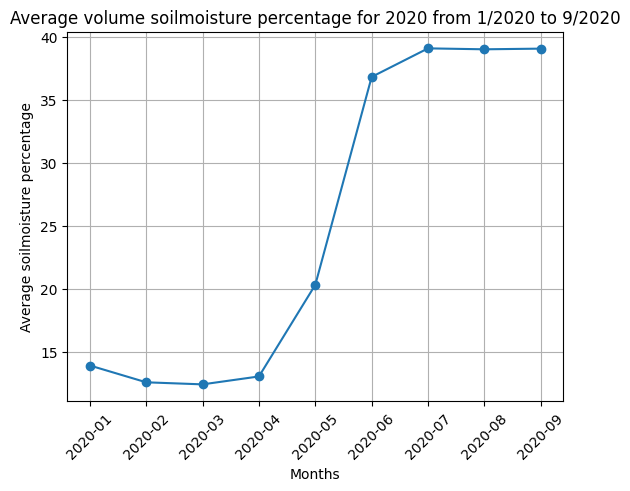

In [101]:
#plot graph of monthly average
plt.plot(monthly_avg_20.index.astype(str), monthly_avg_20.values,marker='o')
plt.xlabel("Months")
plt.ylabel("Average soilmoisture percentage")
plt.title("Average volume soilmoisture percentage for 2020 from 1/2020 to 9/2020")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Both the histogram and violin plot indicate a notable shift in distribution between the years 2018 and 2020. In 2018, the distribution appears more spread out, whereas in 2020, there is a concentration towards lower values. 

*It's important to note that the 2018 data spans from June to December, while the 2020 data covers January to September, reflecting seasonal variations that significantly influence the recordings.*

Seasonal changes clearly affect soil moisture percentages. The month-wise distribution for 2020 shows a substantial increase from May to June, whereas in 2018, there is a downward trend leading up to December.

Average Soil Moisture:
2018:
North Goa: 32.07%
South Goa: 32.70%
Overall Average: 32.38%
2020:
North Goa: 23.11%
South Goa: 24.69%
Overall Average: 23.90%



link to data source- https://data.gov.in/search